### Install and import pycatcher package

In [1]:
pip install pycatcher --upgrade


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pycatcher as pc

### Package functions to detect outliers

- detect_outliers(df): Detect outliers in a time-series dataframe using seasonal trend decomposition when there is at least 2 years of data, otherwise we can use Interquartile Range (IQR) for smaller timeframe.
- detect_outliers_today(df) Detect outliers for the current date in a time-series dataframe.
- detect_outliers_latest(df): Detect latest outliers in a time-series dataframe.
- detect_outliers_iqr(df): Detect outliers in a time-series dataframe when there's less than 2 years of data.
- detect_outliers_moving_average(df): Detect outliers using moving average method.
- detect_outliers_stl(df): Detect outliers using Seasonal-Trend Decomposition using LOESS (STL).
- detect_outliers_mstl(df): Detect outliers using Multiple Seasonal-Trend Decomposition using LOESS (MSTL).

### Diagnostic functions for plotting

In [3]:
from pycatcher.diagnostics import build_seasonal_plot as build_seasonal_plot
from pycatcher.diagnostics import build_monthwise_plot as build_monthwise_plot
from pycatcher.diagnostics import build_iqr_plot as build_iqr_plot
from pycatcher.diagnostics import build_decomposition_results as build_decomposition_results
from pycatcher.diagnostics import conduct_stationarity_check as conduct_stationarity_check
from pycatcher.diagnostics import build_moving_average_outliers_plot as build_moving_average_outliers_plot
from pycatcher.diagnostics import build_classical_seasonal_outliers_plot as build_classical_seasonal_outliers_plot
from pycatcher.diagnostics import build_stl_outliers_plot as build_stl_outliers_plot
from pycatcher.diagnostics import build_mstl_outliers_plot as build_mstl_outliers_plot
from pycatcher.diagnostics import build_seasonal_plot_mstl as build_seasonal_plot_mstl

### Example 1 - Finding Outliers Using IQR

In [4]:
import pandas as pd

df = {
        'Dt': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
        'Value': [100, 120, 140, 250, 160]
}

df = pd.DataFrame(df)
pc.detect_outliers(df)

2024-12-11 18:33:27,761 - INFO - Starting outlier detection.
2024-12-11 18:33:27,763 - INFO - Time frequency: D
2024-12-11 18:33:27,763 - INFO - Length of time index: 5.00
2024-12-11 18:33:27,764 - INFO - Using IQR method for outlier detection.
2024-12-11 18:33:27,764 - INFO - Detecting outliers using the IQR method.
2024-12-11 18:33:27,764 - INFO - Detecting outliers using the IQR method.
2024-12-11 18:33:27,765 - INFO - Outliers detected: 1 rows.
2024-12-11 18:33:27,765 - INFO - Outliers detected using IQR: 1 rows.


,Value
Dt,
2024-01-04,250


2024-12-11 18:33:27,770 - INFO - Building IQR plot to see outliers


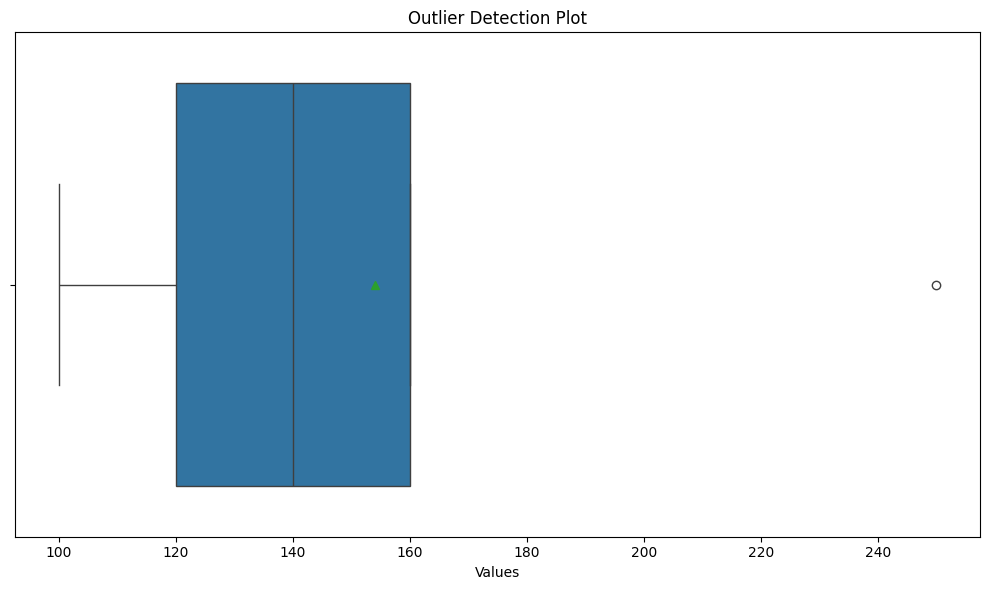

In [5]:
build_iqr_plot(df)

### Example 2 - Finding Outliers Using Classical Seasonal Decomposition Algorithm

In [6]:
!pip install fsspec


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install --upgrade certifi


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import pandas as pd
df_tsa=pd.read_csv("https://huggingface.co/datasets/bbgatch/tsa-passengers/resolve/main/tsa.csv",sep=',')

In [9]:
df_tsa.head(5)

,date,passengers
0,2019-01-01,2201765
1,2019-01-02,2424225
2,2019-01-03,2279384
3,2019-01-04,2230078
4,2019-01-05,2049460


In [10]:
x = pc.detect_outliers_latest(df_tsa) 
print(x)

2024-12-11 18:33:29,077 - INFO - Detecting the latest outliers.
2024-12-11 18:33:29,078 - INFO - Starting outlier detection.
2024-12-11 18:33:29,288 - INFO - Time frequency: D
2024-12-11 18:33:29,288 - INFO - Length of time index: 2017.00
2024-12-11 18:33:29,289 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-12-11 18:33:29,289 - INFO - Decomposing time-series for additive and multiplicative models.
2024-12-11 18:33:29,290 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,291 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,291 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,291 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,291 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-11 18:33:29,292 - INFO - Calculating the sum of squares.
2024-12-11 18:33:29,292 - INFO - Sum of squares calculated: 1.60
2024-12-11 18

            passengers
date                  
2024-07-09     2580013


In [11]:
x = pc.detect_outliers(df_tsa) 
print(x)

2024-12-11 18:33:29,297 - INFO - Starting outlier detection.
2024-12-11 18:33:29,300 - INFO - Time frequency: D
2024-12-11 18:33:29,301 - INFO - Length of time index: 2017.00
2024-12-11 18:33:29,301 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-12-11 18:33:29,301 - INFO - Decomposing time-series for additive and multiplicative models.
2024-12-11 18:33:29,302 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,303 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,303 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,303 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,303 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-11 18:33:29,303 - INFO - Calculating the sum of squares.
2024-12-11 18:33:29,304 - INFO - Sum of squares calculated: 1.60
2024-12-11 18:33:29,304 - INFO - Sum of squares of ACF: 1.60
2024-12-11 18:33

            passengers
date                  
2019-01-20     1845674
2019-05-26     2070716
2019-05-28     2453649
2019-07-04     2088760
2019-07-05     2184253
2019-09-01     1887845
2019-11-26     2435170
2019-11-27     2624250
2019-11-28     1591158
2019-11-29     1968137
2019-11-30     2648268
2019-12-01     2882915
2019-12-25     1996541
2020-11-26      562697
2020-12-23     1244556
2020-12-25      683838
2020-12-31      914456
2021-01-01      849514
2021-01-02     1246953
2021-07-04     1697422
2021-11-23     2217635
2021-11-24     2331880
2021-11-25     1383501
2021-11-26     1783938
2021-11-27     2219149
2021-11-28     2458325
2021-12-24     1713351
2021-12-31     1658357
2022-09-04     1979923
2022-11-22     2370351
2022-11-23     2465337
2022-11-24     1426195
2022-11-25     1984980
2022-11-26     2336633
2022-11-27     2639616
2022-12-21     2428528
2022-12-25     1800463
2023-01-03     2212528
2023-05-28     2257797
2023-09-03     2081144
2023-10-31     1665839
2023-11-21 

In [12]:
x = pc.detect_outliers_today(df_tsa) 
print(x)

2024-12-11 18:33:29,310 - INFO - Detecting today's outliers.
2024-12-11 18:33:29,311 - INFO - Starting outlier detection.
2024-12-11 18:33:29,313 - INFO - Time frequency: D
2024-12-11 18:33:29,314 - INFO - Length of time index: 2017.00
2024-12-11 18:33:29,314 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-12-11 18:33:29,314 - INFO - Decomposing time-series for additive and multiplicative models.
2024-12-11 18:33:29,315 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,315 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,315 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,315 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,316 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-11 18:33:29,316 - INFO - Calculating the sum of squares.
2024-12-11 18:33:29,316 - INFO - Sum of squares calculated: 1.60
2024-12-11 18:33

No Outliers Today!


2024-12-11 18:33:29,321 - INFO - Building outlier plot using classical seasonal decomposition.
2024-12-11 18:33:29,325 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,325 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,326 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,326 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,326 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-11 18:33:29,327 - INFO - Calculating the sum of squares.
2024-12-11 18:33:29,327 - INFO - Sum of squares calculated: 1.60
2024-12-11 18:33:29,327 - INFO - Sum of squares of ACF: 1.60
2024-12-11 18:33:29,327 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-11 18:33:29,328 - INFO - Calculating the sum of squares.
2024-12-11 18:33:29,328 - INFO - Sum of squares calculated: 1.69
2024-12-11 18:33:29,328 - INFO - Sum of squares of ACF: 1.69
2024-12-11 18:33:29,328 - INFO - 

Additive Model


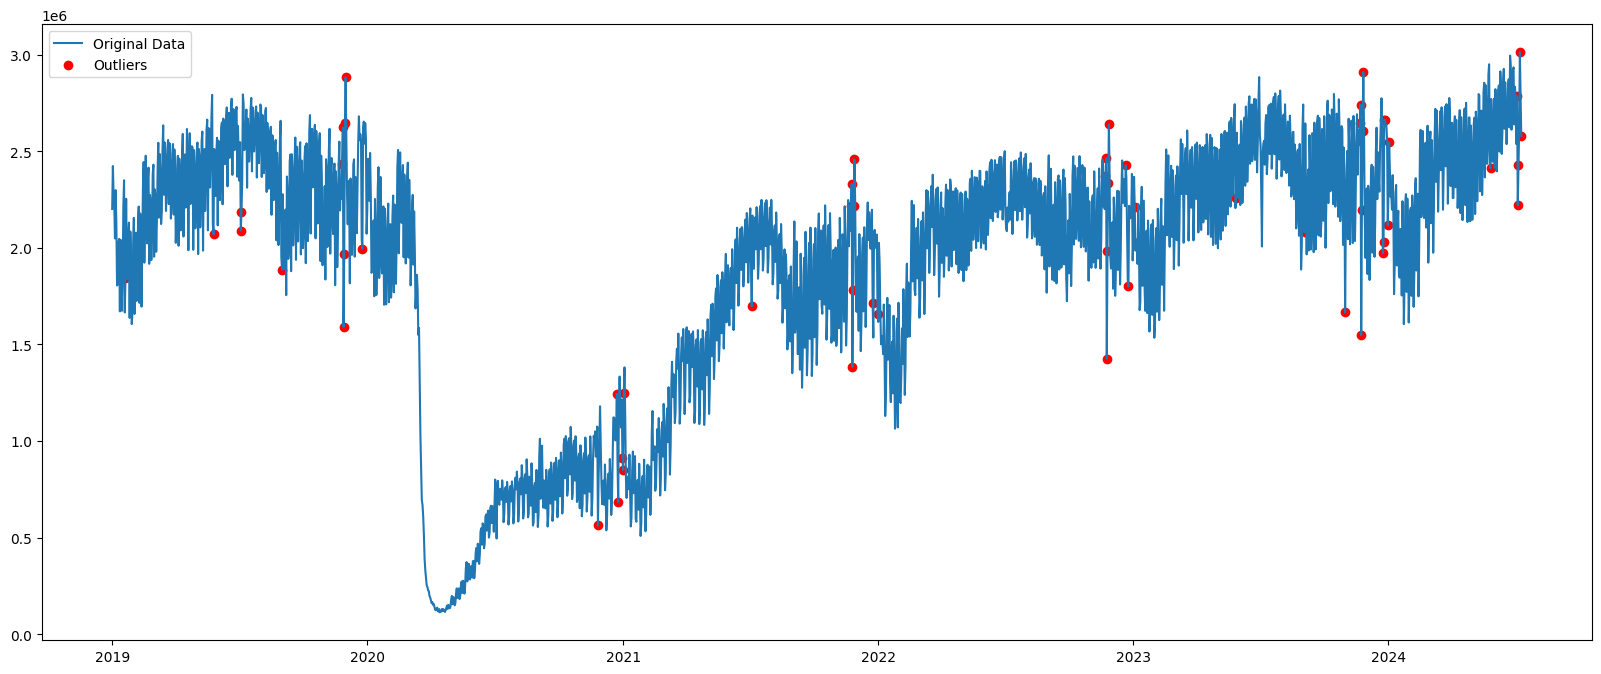

In [13]:
build_classical_seasonal_outliers_plot(df_tsa)

2024-12-11 18:33:29,481 - INFO - Building month-wise box plot.
2024-12-11 18:33:29,500 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-11 18:33:29,503 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


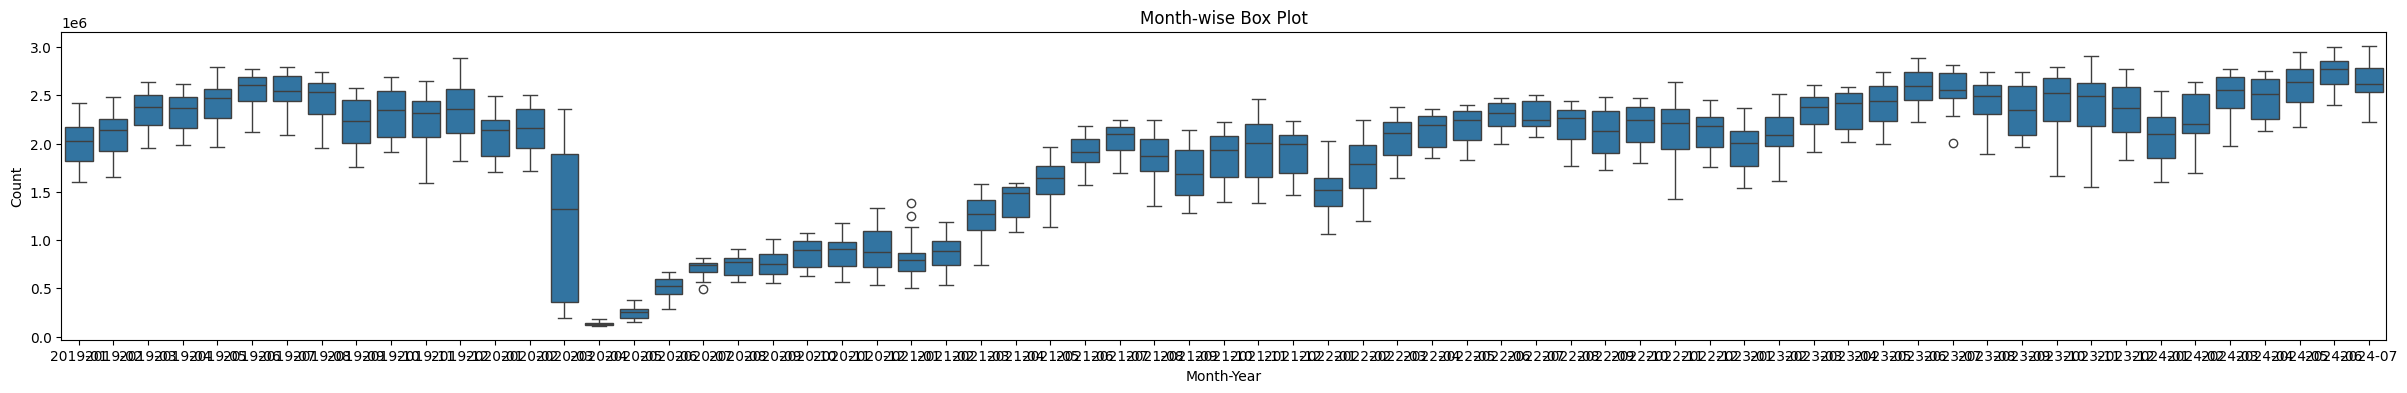

In [14]:
#Diagnostic plots
build_monthwise_plot(df_tsa)

2024-12-11 18:33:29,793 - INFO - Building time-series plot for seasonal decomposition.
2024-12-11 18:33:29,796 - INFO - Time-series data length: 5.00 years
2024-12-11 18:33:29,801 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,812 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,831 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:29,844 - INFO - Number of residuals after NaN removal: 2017
2024-12-11 18:33:29,847 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-11 18:33:29,850 - INFO - Calculating the sum of squares.
2024-12-11 18:33:29,854 - INFO - Sum of squares calculated: 1.60
2024-12-11 18:33:29,856 - INFO - Sum of squares of ACF: 1.60
2024-12-11 18:33:29,858 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-11 18:33:29,863 - INFO - Calculating the sum of squares.
2024-12-11 18:33:29,872 - INFO - Sum of squares calculated: 1.69
2024-12-11 18:33:29,875 - INFO - 

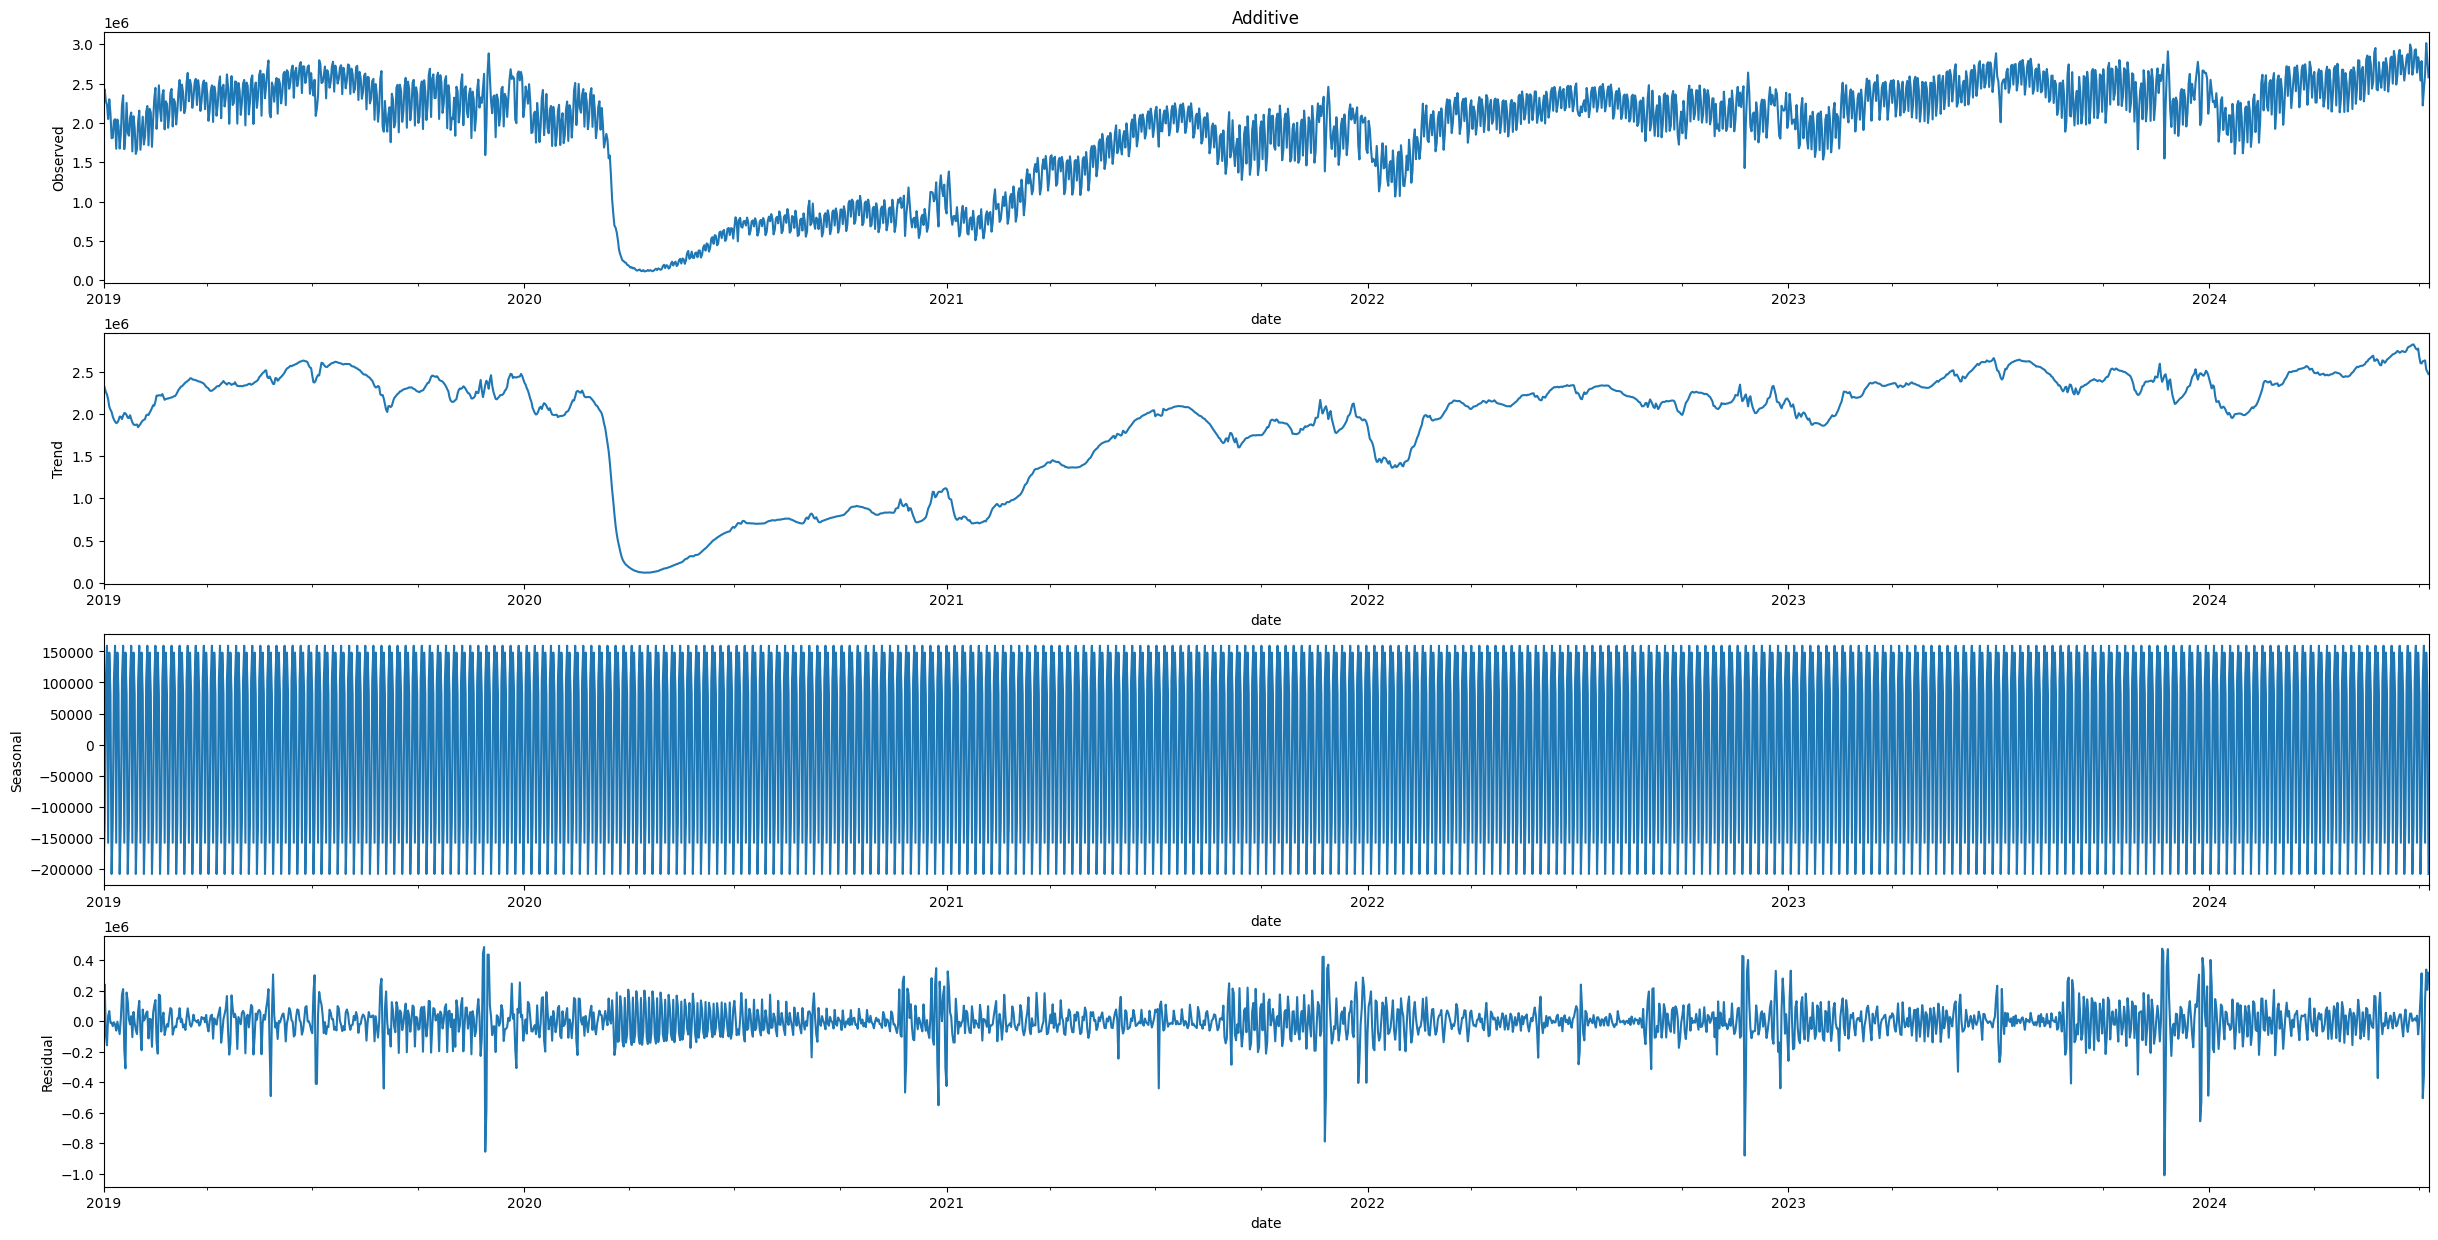

In [15]:
#Diagnostic plots
build_seasonal_plot(df_tsa)

In [16]:
df_ice = pd.read_csv("https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_interest.csv")
df_ice.head(10)

,month,interest
0,2004-01,13
1,2004-02,15
2,2004-03,17
3,2004-04,19
4,2004-05,22
5,2004-06,25
6,2004-07,27
7,2004-08,21
8,2004-09,18
9,2004-10,14


In [17]:
x = pc.detect_outliers(df_ice) 
print(x)

2024-12-11 18:33:30,745 - INFO - Starting outlier detection.
2024-12-11 18:33:30,766 - INFO - Time frequency: MS
2024-12-11 18:33:30,767 - INFO - Length of time index: 200.00
2024-12-11 18:33:30,767 - INFO - Using seasonal trend decomposition for for outlier detection in month level time-series.
2024-12-11 18:33:30,767 - INFO - Decomposing time-series for additive and multiplicative models.
2024-12-11 18:33:30,768 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:30,768 - INFO - Number of residuals after NaN removal: 200
2024-12-11 18:33:30,768 - INFO - Extracting residuals and removing NaN values.
2024-12-11 18:33:30,769 - INFO - Number of residuals after NaN removal: 200
2024-12-11 18:33:30,769 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-11 18:33:30,769 - INFO - Calculating the sum of squares.
2024-12-11 18:33:30,769 - INFO - Sum of squares calculated: 3.47
2024-12-11 18:33:30,769 - INFO - Sum of squares of ACF: 3.47
2024-12-11 18:33

            interest
month               
2011-04-01        45
2016-11-01        46
2016-12-01        66


### Example 3 - Finding Outliers Using Seasonal-Trend Decomposition using LOESS (STL)

In [18]:
pc.detect_outliers_stl(df_ice)

2024-12-11 18:33:30,773 - INFO - Starting outlier detection using STL
2024-12-11 18:33:30,774 - INFO - Time frequency: MS
2024-12-11 18:33:30,775 - INFO - Detected Period: 12
2024-12-11 18:33:30,775 - INFO - Derived Seasonal: 13
2024-12-11 18:33:30,779 - INFO - Multiplicative model detected
2024-12-11 18:33:30,780 - INFO - Generating outlier detection using STL
2024-12-11 18:33:30,780 - INFO - Outlier detection using STL Multiplicative Model
2024-12-11 18:33:30,783 - INFO - Detecting outliers using the MAD method.
2024-12-11 18:33:30,783 - INFO - Outliers detected by MAD!
2024-12-11 18:33:30,784 - INFO - Generated outlier detection using STL
2024-12-11 18:33:30,784 - INFO - Completing outlier detection using STL


,month,interest
0,2009-11-01,21
1,2011-04-01,45
2,2011-10-01,31
3,2016-11-01,46
4,2016-12-01,66


2024-12-11 18:33:30,787 - INFO - Starting outlier detection using STL
2024-12-11 18:33:30,789 - INFO - Time frequency: MS
2024-12-11 18:33:30,793 - INFO - Generating outlier detection using STL
2024-12-11 18:33:30,793 - INFO - Outlier detection using STL Multiplicative Model
2024-12-11 18:33:30,796 - INFO - Detecting outliers using the MAD method.
2024-12-11 18:33:30,796 - INFO - Outliers detected by MAD!
2024-12-11 18:33:30,797 - INFO - Generated outlier detection using STL


Detected Period:  12
Derived Seasonal:  13
Multiplicative model detected


<module 'matplotlib.pyplot' from '/Users/aseem/Documents/GitHub/outlier_detection/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

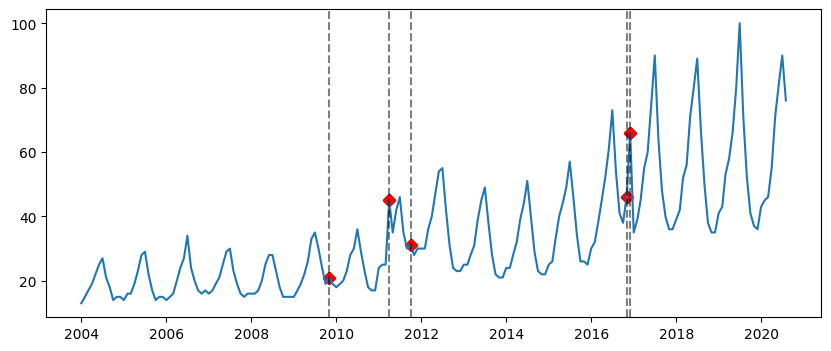

In [19]:
build_stl_outliers_plot(df_ice)

In [20]:
pc.detect_outliers_stl(df_tsa)

2024-12-11 18:33:30,875 - INFO - Starting outlier detection using STL
2024-12-11 18:33:30,877 - INFO - Time frequency: D
2024-12-11 18:33:30,877 - INFO - Detected Period: 365
2024-12-11 18:33:30,877 - INFO - Derived Seasonal: 365
2024-12-11 18:33:31,390 - INFO - Additive model detected
2024-12-11 18:33:31,391 - INFO - Generating outlier detection using STL
2024-12-11 18:33:31,391 - INFO - Outlier detection using STL Additive Model
2024-12-11 18:33:31,648 - INFO - Detecting outliers using the MAD method.
2024-12-11 18:33:31,649 - INFO - Outliers detected by MAD!
2024-12-11 18:33:31,649 - INFO - Generated outlier detection using STL
2024-12-11 18:33:31,650 - INFO - Completing outlier detection using STL


,date,passengers
0,2020-02-17,2494922
1,2020-04-11,119155


2024-12-11 18:33:31,653 - INFO - Starting outlier detection using STL
2024-12-11 18:33:31,656 - INFO - Time frequency: D


Detected Period:  365
Derived Seasonal:  365


2024-12-11 18:33:32,163 - INFO - Generating outlier detection using STL
2024-12-11 18:33:32,164 - INFO - Outlier detection using STL Additive Model


Additive model detected


2024-12-11 18:33:32,415 - INFO - Detecting outliers using the MAD method.
2024-12-11 18:33:32,416 - INFO - Outliers detected by MAD!
2024-12-11 18:33:32,416 - INFO - Generated outlier detection using STL


<module 'matplotlib.pyplot' from '/Users/aseem/Documents/GitHub/outlier_detection/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

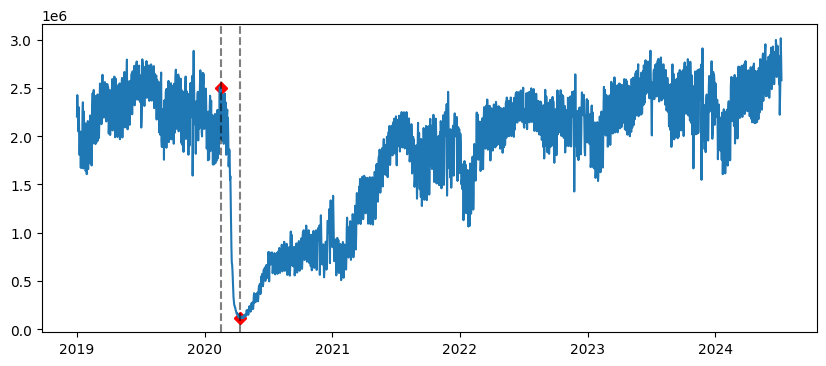

In [21]:
build_stl_outliers_plot(df_tsa)

### Example 4 - Finding Outliers Using Multiple Seasonal-Trend Decomposition using LOESS (MSTL)

In [22]:
pc.detect_outliers_mstl(df_ice)

2024-12-11 18:33:32,484 - INFO - Starting outlier detection using STL
2024-12-11 18:33:32,485 - INFO - Time frequency: MS
2024-12-11 18:33:32,485 - INFO - Derived Period: 12
2024-12-11 18:33:32,489 - INFO - Generating outlier detection using MSTL
2024-12-11 18:33:32,490 - INFO - Outlier detection using MSTL Multiplicative Model
2024-12-11 18:33:32,492 - INFO - Detecting outliers using the MAD method.
2024-12-11 18:33:32,492 - INFO - Outliers detected by MAD!
2024-12-11 18:33:32,493 - INFO - Generated outlier detection using MSTL
2024-12-11 18:33:32,493 - INFO - Completing outlier detection using MSTL


,month,interest
0,2009-11-01,21
1,2011-04-01,45
2,2011-10-01,31
3,2011-12-01,30
4,2016-11-01,46
5,2016-12-01,66


2024-12-11 18:33:32,496 - INFO - Starting outlier detection using MSTL
2024-12-11 18:33:32,497 - INFO - Time frequency: MS
2024-12-11 18:33:32,497 - INFO - Derived Period: 12
2024-12-11 18:33:32,501 - INFO - Multiplicative model detected
2024-12-11 18:33:32,502 - INFO - Generating outlier detection using MSTL
2024-12-11 18:33:32,502 - INFO - Outlier detection using MSTL Multiplicative Model
2024-12-11 18:33:32,504 - INFO - Detecting outliers using the MAD method.
2024-12-11 18:33:32,505 - INFO - Outliers detected by MAD!
2024-12-11 18:33:32,505 - INFO - Generated outlier detection using MSTL
2024-12-11 18:33:32,505 - INFO - Completing outlier detection using MSTL


Outliers:             interest
month               
2009-11-01        21
2011-04-01        45
2011-10-01        31
2011-12-01        30
2016-11-01        46
2016-12-01        66


<module 'matplotlib.pyplot' from '/Users/aseem/Documents/GitHub/outlier_detection/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

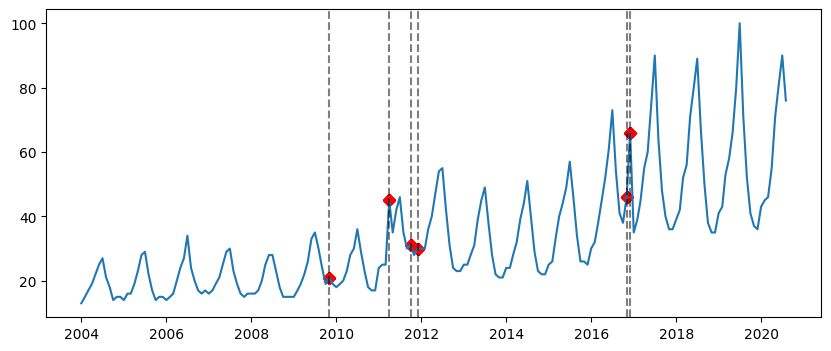

In [23]:
#Diagnostic plots
build_mstl_outliers_plot(df_ice)

2024-12-11 18:33:32,579 - INFO - Starting outlier detection using MSTL
2024-12-11 18:33:32,580 - INFO - Time frequency: MS
2024-12-11 18:33:32,580 - INFO - Derived Period: 12
2024-12-11 18:33:32,584 - INFO - Multiplicative model detected
2024-12-11 18:33:32,721 - INFO - Completing seasonal decomposition plot using MSTL


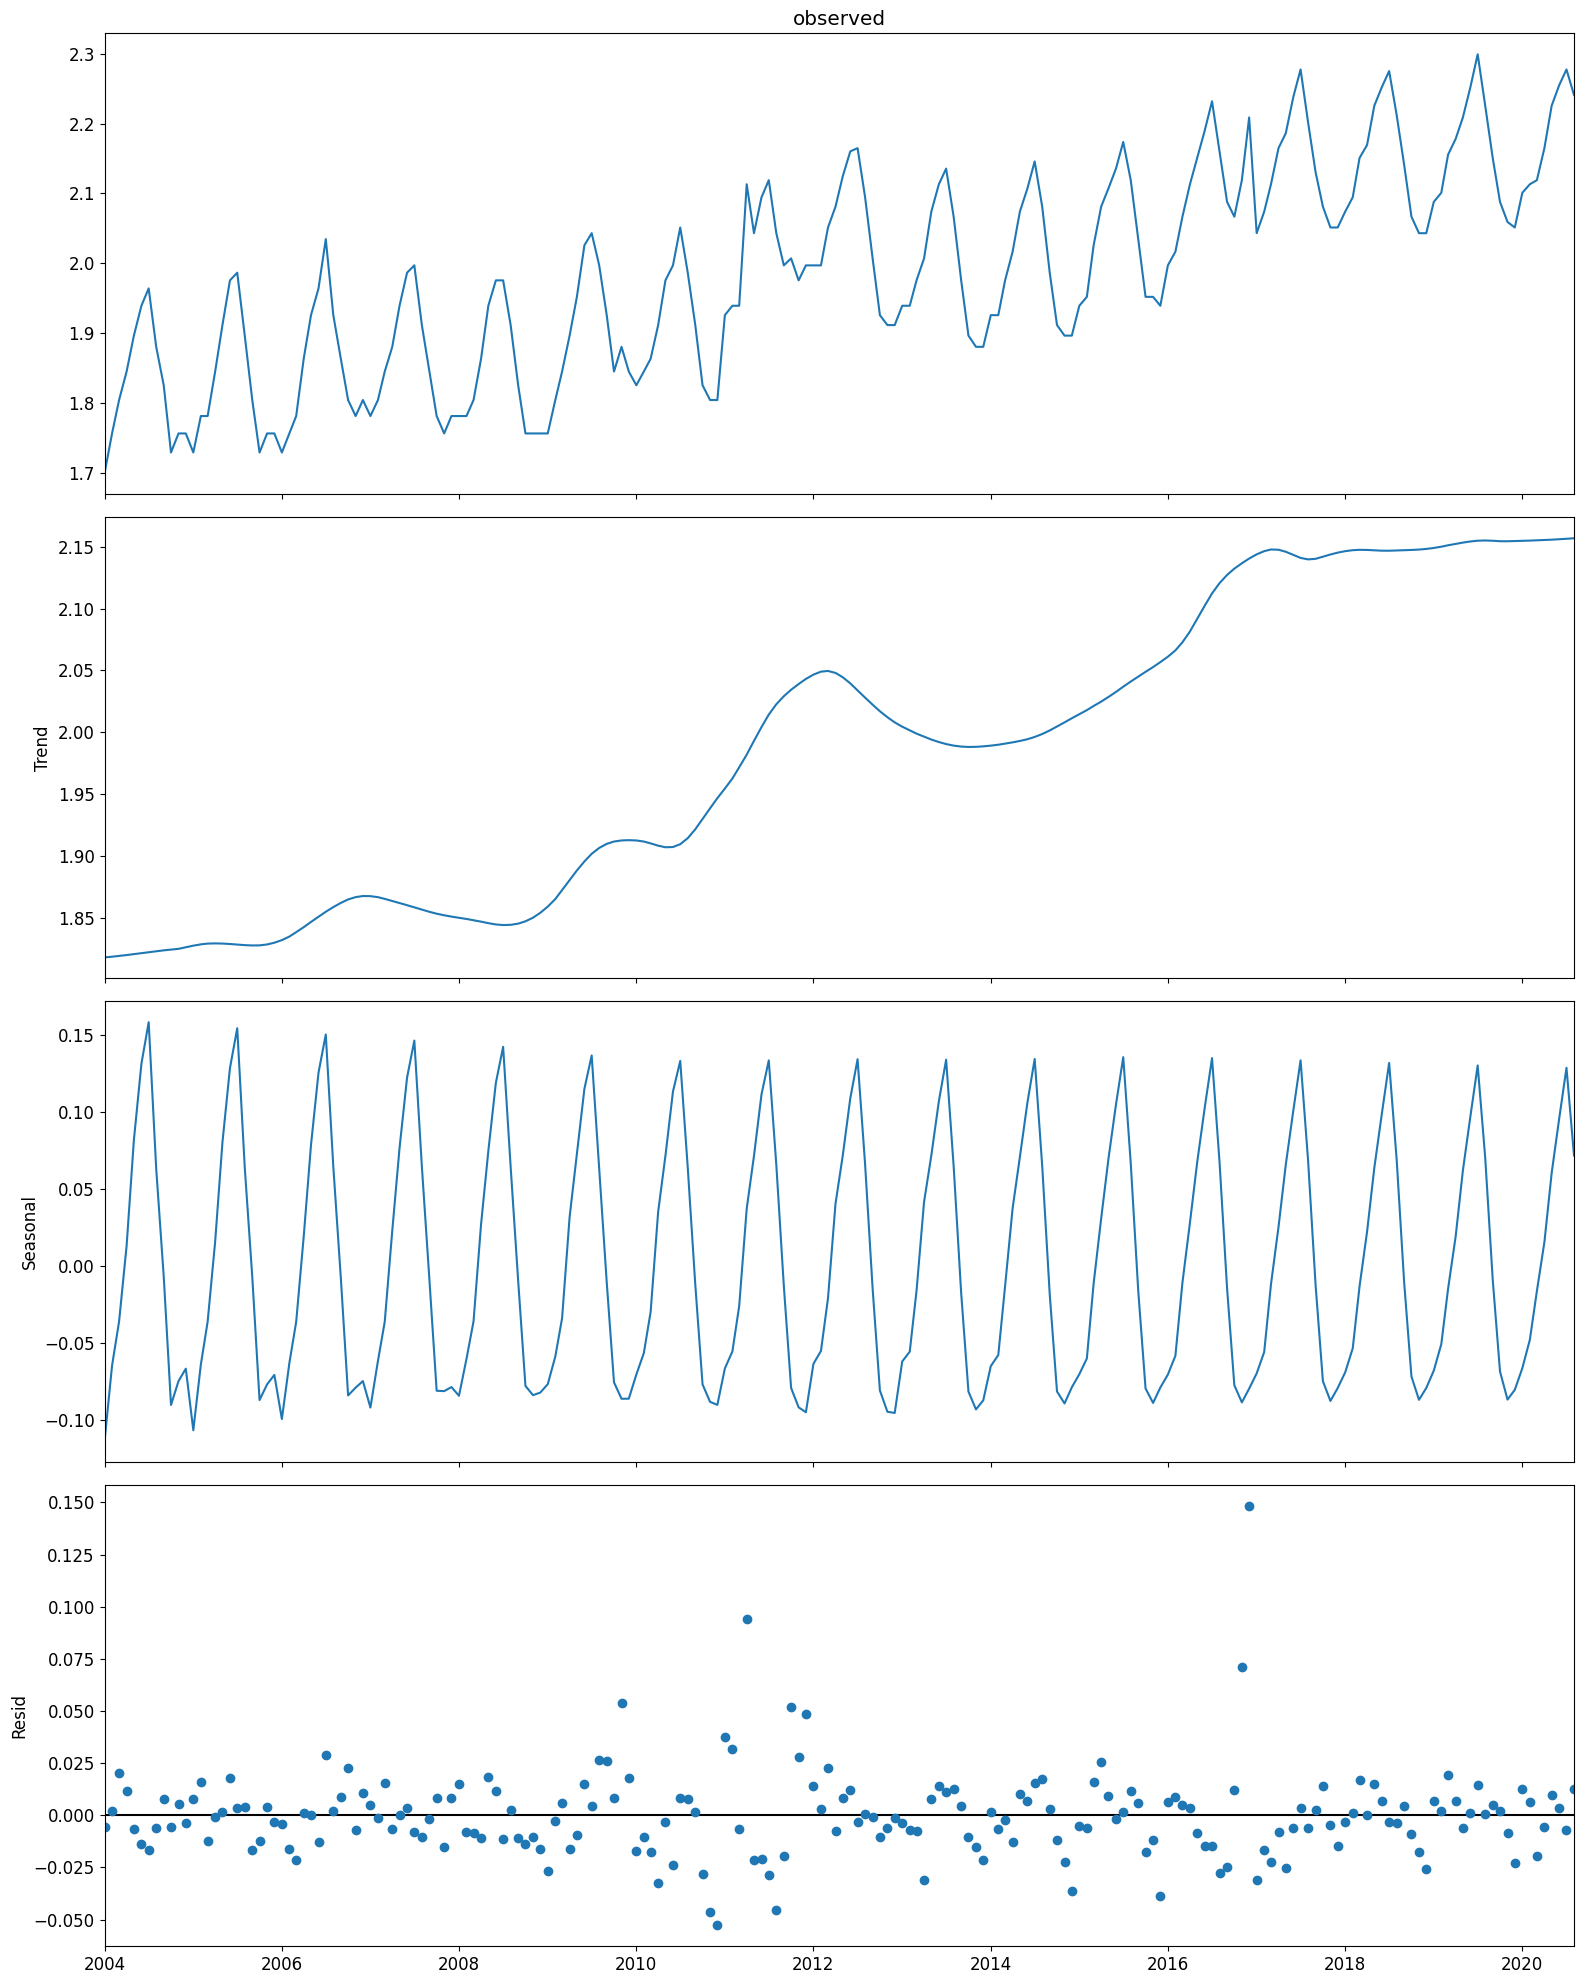

In [24]:
#Diagnostic plots
build_seasonal_plot_mstl(df_ice)

### Example 5 - Finding Outliers Using Moving Average

In [25]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'random numbers': np.random.randn(200)})
df.head(20)

,random numbers
0,-0.989372
1,-1.177254
2,-0.347665
3,1.541938
4,-0.598950
5,-0.353923
6,-2.694992
7,0.531209
8,-0.263507
9,0.505571


2024-12-11 18:33:33,131 - INFO - Plotting outliers using Moving Average method
2024-12-11 18:33:33,132 - INFO - Starting optimal window size calculation
2024-12-11 18:33:33,132 - INFO - Starting RMSE calculation
2024-12-11 18:33:33,192 - INFO - RMSE calculation completed
2024-12-11 18:33:33,192 - INFO - Optimal Window Size: 2
2024-12-11 18:33:33,202 - INFO - Completed outliers plotting using Moving Average method


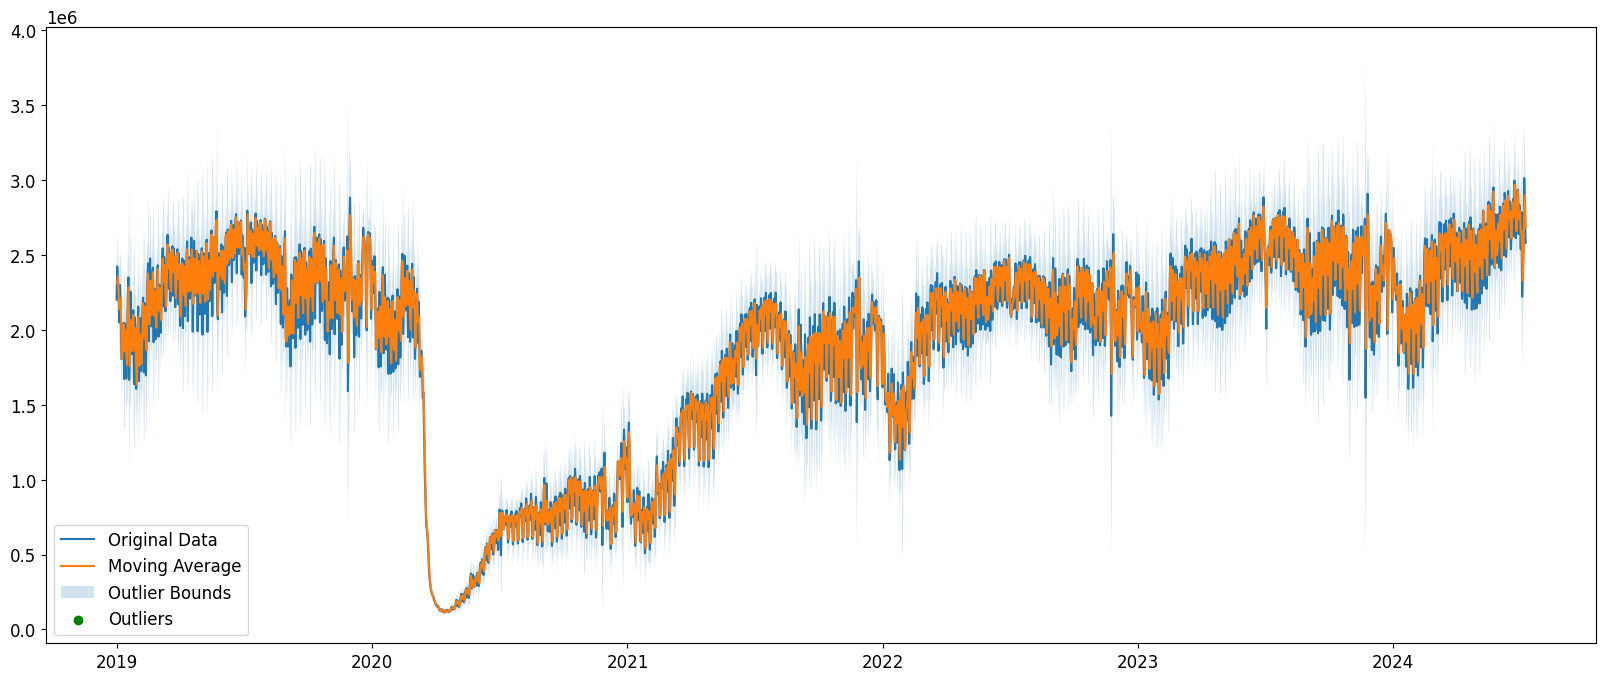

In [26]:
build_moving_average_outliers_plot(df_tsa)

### Example 6 - Miscellaneous diagnostic function - Stationarity Check

In [27]:
conduct_stationarity_check(df_ice)

2024-12-11 18:33:33,391 - INFO - Starting ADF stationarity check
2024-12-11 18:33:33,395 - INFO - ADF Statistic: -0.072707
2024-12-11 18:33:33,395 - INFO - p-value: 0.952090
2024-12-11 18:33:33,395 - INFO - Critical Values:
2024-12-11 18:33:33,395 - INFO - 	1%: -3.466
2024-12-11 18:33:33,395 - INFO - 	5%: -2.877
2024-12-11 18:33:33,396 - INFO - 	10%: -2.575
2024-12-11 18:33:33,396 - INFO - Completed ADF stationarity check
2024-12-11 18:33:33,396 - INFO - Starting KPSS stationarity check
/Users/aseem/Documents/GitHub/outlier_detection/src/pycatcher/diagnostics.py:229: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df_pandas.iloc[:, -1])
2024-12-11 18:33:33,397 - INFO - KPSS Statistic: 2.040868
2024-12-11 18:33:33,397 - INFO - p-value: 0.010000
2024-12-11 18:33:33,397 - INFO - n_lags: 8.000000
2024-12-11 18:33:33,397 

ADF - The series is not Stationary


KPSS - The series is not Stationary
